In [ ]:
!pip install surprise

In [ ]:
!pip install optuna

In [1]:
import pandas as pd
import surprise
from surprise import Reader,Dataset,KNNBasic,KNNWithMeans,KNNWithZScore,KNNBaseline, SVD,SVDpp,NMF,BaselineOnly
from surprise import Dataset
from surprise.model_selection import cross_validate
import seaborn as sns
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

import os
import sys
import platform

import pandas as pd
import numpy as np

import time

print(f"- os: {platform.platform()}")
print(f"- python: {sys.version}")
print(f"- pandas: {pd.__version__}")
print(f"- numpy: {np.__version__}")
print(f"- surprise: {surprise.__version__}")

- os: Windows-10-10.0.19041-SP0
- python: 3.7.13 (default, Mar 28 2022, 08:03:21) [MSC v.1916 64 bit (AMD64)]
- pandas: 1.3.5
- numpy: 1.21.6
- surprise: 1.1.1


In [2]:
uir_df = pd.read_csv('C:/Users/SEO/OneDrive - 숭실대학교 - Soongsil University/바탕 화면/MISS/MISS/data/final_uir_df.csv')#566875 rows
bookinfo = pd.read_csv('C:/Users/SEO/OneDrive - 숭실대학교 - Soongsil University/바탕 화면/MISS/MISS/data/데이터_단행본도서.csv',encoding='CP949')

c:\Users\SEO\.conda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
uir_df = uir_df[['user','item','rating']]
bookinfo = pd.merge(bookinfo,uir_df['item'],left_on = '등록번호',right_on ='item',how = 'right')
bookinfo.drop_duplicates(inplace = True)

In [4]:
uir_df.drop_duplicates(subset=['user','item'],keep = 'last',inplace = True)

<AxesSubplot:xlabel='rating', ylabel='Count'>

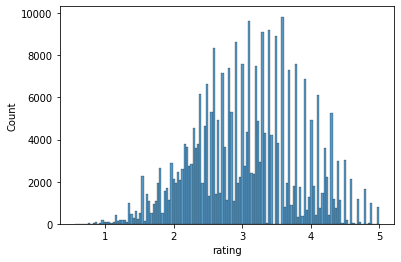

In [8]:
import seaborn as sns
sns.histplot(uir_df['rating'])

In [5]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(uir_df[["user", "item", "rating"]], reader)

In [72]:
del surprise_results
del benchmark

In [6]:
# 협업필터링 비교

benchmark = []
# Iterate over all algorithms

algorithms = [SVD(), SVDpp(),  NMF(), KNNBaseline(), KNNBasic(), KNNWithMeans()]

print ("Attempting: ", str(algorithms), '\n\n\n')

for algorithm in algorithms:
    print("Starting: " ,str(algorithm))
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE',"MAE"], cv=3, verbose=False)
    # results = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    print("Done: " ,str(algorithm), "\n\n")

print ('\n\tDONE\n')

Attempting:  [<surprise.prediction_algorithms.matrix_factorization.SVD object at 0x000001ADDA8E6B88>, <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x000001ADC4C6A088>, <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x000001ADC4B81B08>, <surprise.prediction_algorithms.knns.KNNBaseline object at 0x000001ADC4C44348>, <surprise.prediction_algorithms.knns.KNNBasic object at 0x000001ADC4A16888>, <surprise.prediction_algorithms.knns.KNNWithMeans object at 0x000001ADC4A72F48>] 



Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x000001ADDA8E6B88>
Done:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x000001ADDA8E6B88> 


Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x000001ADC4C6A088>
Done:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x000001ADC4C6A088> 


Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x0000

In [10]:
# 베이스라인 비교

bsl_options_als = {
    'method': 'als',
    'n_epochs': 5,
    'reg_u': 12,
    'reg_i': 5
}
algo_als = surprise.BaselineOnly(bsl_options=bsl_options_als)
algo_als_result = cross_validate(algo_als, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
bsl_options_sgd = {
    'method': 'sgd',
    'n_epochs': 5,
    'learning_rate': 0.01,
    'reg': 0.01
}
algo_sgd = surprise.BaselineOnly(bsl_options=bsl_options_sgd)
algo_sgd_result = cross_validate(algo_sgd, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
result= [algo_als_result,algo_sgd_result]
name = ['als','sgd']
for i in range(len(result)):
    tmp = pd.DataFrame.from_dict(result[i]).mean(axis=0)
    tmp = tmp.append(pd.Series(['baseline'+'_'+name[i]], index=['Algorithm']))
    benchmark.append(tmp)


Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.6737  0.6755  0.6779  0.6757  0.0017  
MAE (testset)     0.5482  0.5498  0.5518  0.5499  0.0015  
Fit time          0.56    0.61    0.59    0.59    0.02    
Test time         0.48    0.48    0.44    0.47    0.02    
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Evaluating RMSE, MAE of algorithm BaselineOnly on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.6932  0.6960  0.6949  0.6947  0.0012  
MAE (testset)     0.5647  0.5669  0.5645  0.5654  0.0011  
Fit time          0.41    0.46    0.46    0.44    0.02    
Test time         0.96    0.43    0.45    0.61    0.25    


In [11]:
# 유사도 비교 
call_sim = ['cosine','msd','pearson_baseline']
for name in call_sim:
  re = KNNBasic(sim_options={'name': name})
  results = cross_validate(re, data, measures=['RMSE','MAE'], cv=3, verbose=False)
  tmp = pd.DataFrame.from_dict(results).mean(axis=0)
  tmp = tmp.append(pd.Series([name], index=['Algorithm']))
  tmp['test_rmse']
  benchmark.append(tmp)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [12]:
del surprise_results

In [13]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [14]:
surprise_results = surprise_results.sort_values('test_mae')
surprise_results

,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
SVDpp,0.676011,0.547423,69.056845,2.931488
baseline_als,0.675688,0.549949,0.587849,0.466379
SVD,0.685842,0.556515,11.519868,0.798553
baseline_sgd,0.694706,0.565388,0.443108,0.614127
KNNBaseline,0.704225,0.572275,5.086912,1.184254
KNNWithMeans,0.750727,0.606843,4.187339,1.024552
msd,0.773810,0.629847,3.620417,1.153599
pearson_baseline,0.770972,0.630441,5.318954,1.080886
KNNBasic,0.774482,0.630537,4.078590,1.284555


baseline_als와  SVDpp모두 유사한 성능을 내는 것을 확인했고 모두 최적화한 대상이 아니기 때문에 최적화 가능한 파라미터가 많은 SVDpp를 최종 모델로 선정하게 되었다.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SVDpp'),
  Text(1, 0, 'SVD'),
  Text(2, 0, 'baseline_sgd'),
  Text(3, 0, 'KNNWithMeans'),
  Text(4, 0, 'pearson_baseline')])

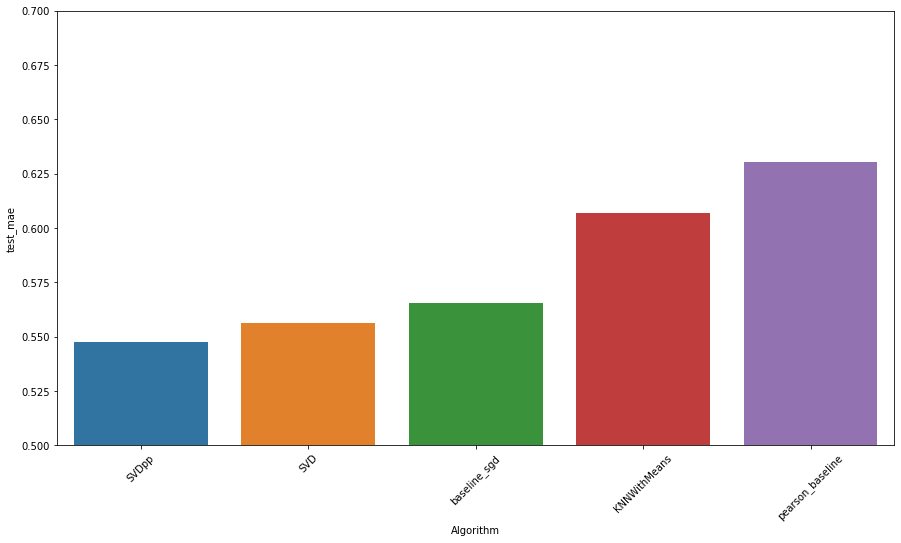

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
data = surprise_results.loc[['SVDpp','SVD','baseline_sgd','KNNWithMeans','pearson_baseline']]

plt.figure(figsize = (15,8))
a = sns.barplot(data = data, x=data.index, y = 'test_mae')
a.set(ylim= (0.5,0.7))
plt.xticks(rotation = 45)

# parameter 최적화

In [11]:
!pip install optuna

  Using cached optuna-2.10.1-py3-none-any.whl (308 kB)
  Using cached cmaes-0.8.2-py3-none-any.whl (15 kB)
  Using cached colorlog-6.6.0-py2.py3-none-any.whl (11 kB)
  Using cached alembic-1.8.1-py3-none-any.whl (209 kB)
  Using cached cliff-3.10.1-py3-none-any.whl (81 kB)
  Using cached Mako-1.2.1-py3-none-any.whl (78 kB)
  Using cached autopage-0.5.1-py3-none-any.whl (29 kB)
  Using cached pbr-5.9.0-py2.py3-none-any.whl (112 kB)
  Using cached stevedore-3.5.0-py3-none-any.whl (49 kB)
  Using cached prettytable-3.3.0-py3-none-any.whl (26 kB)
  Using cached cmd2-2.4.2-py3-none-any.whl (147 kB)
  Using cached attrs-22.1.0-py2.py3-none-any.whl (58 kB)
  Using cached pyreadline3-3.4.1-py3-none-any.whl (95 kB)
  Using cached pyperclip-1.8.2.tar.gz (20 kB)
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=75589cc2b3643dbc9e00c1e1c2d54f8193705a357f07a8e0663a55ac45f09ba4
  Stored in directory: c:\users\seo\appdata\local\pip\cache\wheels\9f\18\84\8f69f8

In [11]:
import optuna

In [12]:
def objective(trial):
    # train_x, valid_x, train_y, valid_y = train_test_split(x_train,y_train, test_size=0.3)
    
    #define parameters
    params = {
        'n_factors':trial.suggest_int("n_factors", 50, 120),
        'lr_all' : trial.suggest_uniform('lr_all',0.001,0.07),
        'reg_all' : trial.suggest_uniform('lr_all',0.001,0.07),
    }
    

    # model fit
    model = SVDpp(**params)
    result = cross_validate(model, data, measures=['RMSE','MAE'], cv=5, verbose=False)
    
    # validation prediction
    tmp = pd.DataFrame.from_dict(result).mean(axis=0)
    # tmp = tmp.append(pd.Series([name], index=['Algorithm']))
    score = tmp['test_rmse']
    return score

In [20]:
def als(trial):
    # train_x, valid_x, train_y, valid_y = train_test_split(x_train,y_train, test_size=0.3)
    
    #define parameters
    bsl_options_als = {
    'method': trial.suggest_categorical('method',['als','sgd']),
    'n_epochs': trial.suggest_int('n_epochs',5,20)
    }
    if bsl_options_als['method'] == 'als':
        bsl_options_als['reg_u'] = trial.suggest_int('reg_u',10,20)
        bsl_options_als['reg_i'] = trial.suggest_int('reg_i',10,20)
    else:
        bsl_options_als['learning_rate'] = trial.suggest_uniform('learning_rate',0.001,0.5)
        bsl_options_als['reg'] = trial.suggest_uniform('reg',0.001,0.5)
        
    algo_als = surprise.BaselineOnly(bsl_options=bsl_options_als)
    algo_als_result = cross_validate(algo_als, data, measures=["RMSE", "MAE"], cv=5, verbose=False)
    
    # validation prediction
    tmp = pd.DataFrame.from_dict(algo_als_result).mean(axis=0)
    # tmp = tmp.append(pd.Series([name], index=['Algorithm']))
    score = tmp['test_rmse']
    return score

In [21]:
study = optuna.create_study(sampler=optuna.samplers.TPESampler(),direction='minimize')
study.optimize(als,n_trials=15)

[I 2022-08-09 20:48:45,556] A new study created in memory with name: no-name-1db256a2-9e69-458c-83c4-ce6ea66b90b2


Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


[I 2022-08-09 20:48:59,504] Trial 0 finished with value: 0.7292040363097585 and parameters: {'method': 'sgd', 'n_epochs': 18, 'learning_rate': 0.20816151484402529, 'reg': 0.01632696958928701}. Best is trial 0 with value: 0.7292040363097585.


Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


[I 2022-08-09 20:49:10,230] Trial 1 finished with value: 0.6867047872060729 and parameters: {'method': 'als', 'n_epochs': 7, 'reg_u': 13, 'reg_i': 15}. Best is trial 1 with value: 0.6867047872060729.


Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


[I 2022-08-09 20:49:23,649] Trial 2 finished with value: 0.6860473579066583 and parameters: {'method': 'sgd', 'n_epochs': 16, 'learning_rate': 0.08285833068063991, 'reg': 0.028494331222989822}. Best is trial 2 with value: 0.6860473579066583.


Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


[I 2022-08-09 20:49:34,496] Trial 3 finished with value: 0.6731464140912189 and parameters: {'method': 'sgd', 'n_epochs': 8, 'learning_rate': 0.10547254015906361, 'reg': 0.31853203956629733}. Best is trial 3 with value: 0.6731464140912189.


Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


[I 2022-08-09 20:49:47,109] Trial 4 finished with value: 0.7412082676480873 and parameters: {'method': 'sgd', 'n_epochs': 13, 'learning_rate': 0.3822657385195904, 'reg': 0.3165374216351548}. Best is trial 3 with value: 0.6731464140912189.


Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


[I 2022-08-09 20:49:57,162] Trial 5 finished with value: 0.6790357340701899 and parameters: {'method': 'als', 'n_epochs': 5, 'reg_u': 10, 'reg_i': 11}. Best is trial 3 with value: 0.6731464140912189.


Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


[I 2022-08-09 20:50:08,781] Trial 6 finished with value: 0.6632008940071721 and parameters: {'method': 'sgd', 'n_epochs': 12, 'learning_rate': 0.020665926257793954, 'reg': 0.33943478370913666}. Best is trial 6 with value: 0.6632008940071721.


Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


[I 2022-08-09 20:50:22,745] Trial 7 finished with value: 0.6770193548154783 and parameters: {'method': 'sgd', 'n_epochs': 19, 'learning_rate': 0.07707768370015168, 'reg': 0.4085744427149586}. Best is trial 6 with value: 0.6632008940071721.


Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


[I 2022-08-09 20:50:35,002] Trial 8 finished with value: 0.6933385815281372 and parameters: {'method': 'als', 'n_epochs': 10, 'reg_u': 19, 'reg_i': 18}. Best is trial 6 with value: 0.6632008940071721.


Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


[I 2022-08-09 20:50:53,617] Trial 9 finished with value: 0.6864382321244038 and parameters: {'method': 'als', 'n_epochs': 19, 'reg_u': 13, 'reg_i': 15}. Best is trial 6 with value: 0.6632008940071721.


Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


[I 2022-08-09 20:51:06,596] Trial 10 finished with value: 0.7491599595164816 and parameters: {'method': 'sgd', 'n_epochs': 13, 'learning_rate': 0.43431656946233, 'reg': 0.4959119484690099}. Best is trial 6 with value: 0.6632008940071721.


Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


[I 2022-08-09 20:51:18,011] Trial 11 finished with value: 0.6703929210357017 and parameters: {'method': 'sgd', 'n_epochs': 9, 'learning_rate': 0.0130150666439651, 'reg': 0.2306214770894668}. Best is trial 6 with value: 0.6632008940071721.


Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


[I 2022-08-09 20:51:29,974] Trial 12 finished with value: 0.6595478386790166 and parameters: {'method': 'sgd', 'n_epochs': 11, 'learning_rate': 0.025773688717430663, 'reg': 0.19850828148691738}. Best is trial 12 with value: 0.6595478386790166.


Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


[I 2022-08-09 20:51:42,053] Trial 13 finished with value: 0.7089073334299726 and parameters: {'method': 'sgd', 'n_epochs': 11, 'learning_rate': 0.2303116182850959, 'reg': 0.2000449463278424}. Best is trial 12 with value: 0.6595478386790166.


Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


[I 2022-08-09 20:51:55,279] Trial 14 finished with value: 0.6877820800668777 and parameters: {'method': 'sgd', 'n_epochs': 14, 'learning_rate': 0.0037435665943789803, 'reg': 0.1411222096414565}. Best is trial 12 with value: 0.6595478386790166.


In [41]:
def objective(trial):
    # train_x, valid_x, train_y, valid_y = train_test_split(x_train,y_train, test_size=0.3)
    
    #define parameters
    params = {
        'n_factors':trial.suggest_int("n_factors", 10, 50),
        'lr_all' : trial.suggest_uniform('lr_all',0.001,0.07),
        'reg_all' : trial.suggest_uniform('reg_all',0.001,0.07),
    }
    
    
    # model fit
    model = SVDpp(**params)
    result = cross_validate(model, data, measures=['RMSE','MAE'], cv=5, verbose=False)
    
    # validation prediction
    tmp = pd.DataFrame.from_dict(result).mean(axis=0)
    # tmp = tmp.append(pd.Series([name], index=['Algorithm']))
    score = tmp['test_rmse']
    return score

In [43]:
study = optuna.create_study(sampler=optuna.samplers.TPESampler(),direction='minimize')
study.optimize(objective,n_trials=15)

[I 2022-08-09 21:20:47,725] A new study created in memory with name: no-name-d8afcaeb-f92b-43c4-bbfa-387f86de1e06
[I 2022-08-09 21:30:51,839] Trial 0 finished with value: 0.6931390990198232 and parameters: {'n_factors': 31, 'lr_all': 0.055355621840764334, 'reg_all': 0.001668379849052135}. Best is trial 0 with value: 0.6931390990198232.
[I 2022-08-09 21:38:29,931] Trial 1 finished with value: 0.6876250001004938 and parameters: {'n_factors': 17, 'lr_all': 0.05841958887362699, 'reg_all': 0.024466102380432977}. Best is trial 1 with value: 0.6876250001004938.
[I 2022-08-09 21:48:59,035] Trial 2 finished with value: 0.6694535461911483 and parameters: {'n_factors': 32, 'lr_all': 0.018434778883546235, 'reg_all': 0.02878057563517559}. Best is trial 2 with value: 0.6694535461911483.
[I 2022-08-09 22:00:30,268] Trial 3 finished with value: 0.6876736803355199 and parameters: {'n_factors': 37, 'lr_all': 0.04277889168973009, 'reg_all': 0.003937453286324668}. Best is trial 2 with value: 0.66945354619

In [46]:

print("Best trial until now:")
print(" Value: ", study.best_trial.value)
print(" Params: ")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

Best trial until now:
 Value:  0.6632925827047771
 Params: 
    n_factors: 16
    lr_all: 0.016408483971331426
    reg_all: 0.05089362332687015


In [45]:
import joblib
joblib.dump(study, "study2.pkl")

['study2.pkl']